# Proton Exchange Membrane Water Electrolyzer Example
---
In this example, we will explore the functionality of the Proton Exchange Membrane (PEM) Water Electrolyzer model in GreenHEART. We'll walk through key components, demonstrate how the model operates.

### Import Required Modules
We start by importing the necessary modules and setting up our working environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import greenheart.tools.eco.electrolysis as he_elec
import greenheart.tools.plant_sizing_estimation as gh_sizing
from greenheart.simulation.technologies.hydrogen.electrolysis import PEM_tools
from greenheart.simulation.technologies.hydrogen.electrolysis import run_h2_PEM

/Users/egrant/Documents/projects/GreenHEART/examples/log/hybrid_systems_2024-10-24T10.51.43.251977.log


### Read in Renewable Power Profile
The power profile is a required input for operating the electrolyzer, as it dictates the available energy for hydrogen production.

In [2]:
power_profile_filename = './inputs/power_profile/renewable_power_signal.csv'
power_profile = pd.read_csv(power_profile_filename,index_col='Unnamed: 0')

### Load Configuration for the PEM Model
Load the default configuration in a dictionary for the PEM model. Some options in the configuration dictionary are commented out but can be enabled depending on the specific simulation requirements.

In [3]:
default_config = {
    'project_parameters': 
            {
                'atb_year': 2022,
                'grid_connection': False,
                'ppa_price': 0.025,
                'hybrid_electricity_estimated_cf': 0.492,
                'project_lifetime':30,
            },
    # 'component_sizing': 
    #         {
    #             'hybrid_electricity_estimated_cf': 0.492,
    #             'electrolyzer': 
    #             {
    #                 'resize_for_enduse': False,
    #                 'size_for': 'BOL'
    #                 },
    #         },
    'electrolyzer': 
            {   'sizing': 
                    {
                    'resize_for_enduse': False,
                    'size_for': 'BOL',
                    'hydrogen_dmd': None,
                    },
                'rating': 960,
                'electrolyzer_capex': 700,
                'time_between_replacement': 62320,
                'replacement_cost_percent': 0.15,
                'cost_model': 'singlitico2021',
                'cluster_rating_MW': 40,
                'pem_control_type': 'basic',
                'include_degradation_penalty': True,
                'eol_eff_percent_loss': 13,
                'uptime_hours_until_eol': 77600,  #new
                'turndown_ratio': 0.1, #new
                # 'hydrogen_dmd': None,
            },
    'steel': 
            {   'capacity':{
                    'input_capacity_factor_estimate': 0.9,
                'annual_production_target': 1000000,
            }
            }
    # 'end_use': 
    #         {
    #             'annual_production_target': 1000000,
    #             'estimated_cf': 0.9,
    #             'product': 'steel'
    #         }
}

### Execute PEM Electrolyzer Physics
The following results are returned and stored in a dictionary:

- `"H2_Results"`: Contains detailed hydrogen production results.
- `"capacity_factor"`: The operational capacity factor, derived from `H2_Results["Life: Capacity Factor"]`.
- `"equipment_mass_kg"`: The total mass of the equipment in kilograms.
- `"equipment_footprint_m2"`: The equipment's footprint in square meters.
- `"power_to_electrolyzer_kw"`: The power supplied to the electrolyzer in kilowatts.

In [4]:
electrolyzer_physics_results = he_elec.run_electrolyzer_physics(power_profile, default_config, wind_resource = None, design_scenario='off-grid', show_plots=False, save_plots=False, verbose=False)
H2_results = electrolyzer_physics_results["H2_Results"]

print("Electrolyzer Physics Results")
print("Electrolyzer Capacity Factor: ",np.round(electrolyzer_physics_results['capacity_factor']*100,2), " [%]")
print("Equipment mass: ", electrolyzer_physics_results["equipment_mass_kg"], " [kg]")
print("Equipment footprint: ", electrolyzer_physics_results["equipment_footprint_m2"], " [m^2]")

Electrolyzer Physics Results
Electrolyzer Capacity Factor:  38.89  [%]
Equipment mass:  21047681.9657436  [kg]
Equipment footprint:  46080.0  [m^2]


### Additional Options in H2_Results
The H2_Results dictionary contains a wide range of performance metrics and outputs, including but not limited to:
1. Rated outputs:
- `'Rated BOL: Efficiency [kWh/kg]'` (float)
- `'Rated BOL: H2 Production [kg/hr]'` (float)
- `'Rated BOL: Power Consumed [kWh]'` (float)
- `'Rated BOL: Annual H2 Production [kg/year]'` (float)
- `'Rated BOL: Gal H2O per kg-H2'` (float)

2. Simulation outputs:
- `'Sim: Capacity Factor'` (float)
- `'Sim: Active Time / Sim Time'` (float)
- `'Sim: Total Input Power [kWh]'` (float)
- `'Sim: Total H2 Produced [kg]'` (float)
- `'Sim: Average Efficiency [%-HHV]'` (float)
- `'Sim: Total Stack Off-Cycles'` (float)
- `'Sim: H2 Warm-Up Losses [kg]'` (float)
- `'Sim: Total Water Consumption [kg]'` (float)

3. Lifetime outputs:
- `'Life: Capacity Factor'` (float)
- `'Life: Annual H2 production [kg/year]'` (float)
- `'Stack Life [hrs]'` (float)
- `'Time Until Replacement [hrs]'` (float)
- `'Life: Efficiency [kWh/kg]'` (float)
- `'Life: Efficiency [%-HHV]'` (float)
- `'Life: Annual Power Consumption [kWh/year]'` (float)
- `'Performance Schedules'` (pandas.DataFrame)

4. Water outputs:
- `'Hydrogen Hourly Production [kg/hr]'` (numpy.array)
- `'Water Hourly Consumption [kg/hr]'` (numpy.array)

### Print H2_results

In [5]:
# Iterate through the dictionary and print results
for key, value in H2_results.items():
    # Skip if the value is a DataFrame
    if isinstance(value, pd.DataFrame):
        continue
    # Sum and print if the value is a list or NumPy array
    elif isinstance(value, (list, np.ndarray)):
        print(f"{key} (sum): {np.round(np.sum(value), 2)}")
    # Check if the value is numeric before rounding and printing
    elif isinstance(value, (int, float)):
        print(f"{key}: {np.round(value, 2)}")
    else:
        print(f"{key}: {value}")


Rated BOL: Efficiency [kWh/kg]: 54.61
Rated BOL: H2 Production [kg/hr]: 17579.3
Rated BOL: Power Consumed [kWh]: 960018.4
Rated BOL: Annual H2 Production [kg/year]: 153994660.2
Rated BOL: Gal H2O per kg-H2: 2.64
Sim: Capacity Factor: 0.41
Sim: Active Time / Sim Time: 0.81
Sim: Total Input Power [kWh]: 3383382801.27
Sim: Total H2 Produced [kg]: 63200403.14
Sim: Average Efficiency [%-HHV]: 0.74
Sim: Total Stack Off-Cycles: 9483
Sim: H2 Warm-Up Losses [kg]: 240892.61
Sim: Total Water Consumption [kg]: 632004031.37
Life: Capacity Factor: 0.39
Life: Annual H2 production [kg/year]: 59892232.12
Stack Life [hrs]: 23633.65
Time Until Replacement [hrs]: 28947.56
Life: Efficiency [kWh/kg]: 56.53
Life: Efficiency [%-HHV]: 0.7
Life: Annual Power Consumption [kWh/year]: 3383382801.27
Hydrogen Hourly Production [kg/hr] (sum): 63200403.14
Water Hourly Consumption [kg/hr] (sum): 632004031.37


### PEM Electrolyzer Performance Schedule

The Performance Schedule DataFrame shows electrolyzer performance for every year of the simulation.
- Capacity Factor: Electrolyzer capacity factor averaged across all the clusters [-]
- Refurbishment Schedule: How many clusters are replaced each year [MW replaced/year]
- Annual H2 Production: Total annual hydrogen production across all clusters each year [kg/year]
- Annual Average Efficiency: Average annual efficiency across all clusters across the whole year [kWh/kg]
- Annual Average Efficiency: Average annual efficiency across all clusters across the whole year in higher heating value units [%-HHV]
- Annual Energy Used: Total annual energy across the clusters [kWh/year]

In [ ]:
H2_results['Performance Schedules']

,Capacity Factor [-],Refurbishment Schedule [MW replaced/year],Annual H2 Production [kg/year],Annual Average Efficiency [kWh/kg],Annual Average Efficiency [%-HHV],Annual Energy Used [kWh/year]
0,0.410406,0.0,6.320040e+07,53.538638,0.736119,3.383383e+09
1,0.394358,0.0,6.072905e+07,55.722812,0.707299,3.383383e+09
2,0.380220,240.0,5.855192e+07,57.796786,0.681935,3.383383e+09
3,0.391637,720.0,6.030995e+07,56.112551,0.702605,3.383383e+09
4,0.391058,240.0,6.022088e+07,56.224487,0.701277,3.383383e+09
5,0.383520,0.0,5.906008e+07,57.295112,0.687956,3.383383e+09
6,0.388337,960.0,5.980178e+07,56.614225,0.696583,3.383383e+09
7,0.394358,0.0,6.072905e+07,55.722812,0.707299,3.383383e+09
8,0.380220,240.0,5.855192e+07,57.796786,0.681935,3.383383e+09
9,0.391637,720.0,6.030995e+07,56.112551,0.702605,3.383383e+09


### Get the time-series data and rated hydrogen production

In [ ]:
# Total hydrogen output timeseries (kg-H2/hour)
hydrogen_production_kg_pr_hr = H2_results['Hydrogen Hourly Production [kg/hr]']
# Rated/maximum hydrogen production from electrolysis system
max_h2_pr_h2 = H2_results['Rated BOL: H2 Production [kg/hr]']
#x-values as hours of year
hours_of_year = np.arange(0,len(hydrogen_production_kg_pr_hr),1)

### Plot results (Optional)
We're only going to look at 72 hour frame of the results, starting at hour 2000.

The top plot shows the hydrogen produced (green solid line) with the rated hydrogen production indicated by a red dashed line.

The bottom plot shows the total energy input to the electrolyzer (green solid line) and the individual wind (blue dotted line) and solar (orange dashed line) generation profiles.

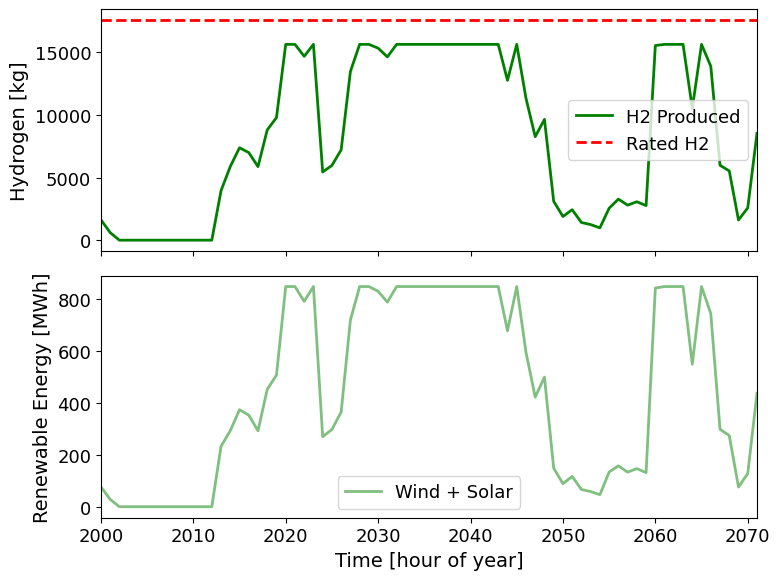

In [ ]:
hour_start = 2000
n_hours = 72
hour_end = hour_start + n_hours

fig,ax=plt.subplots(2,1,sharex=True)
fig.set_figwidth(8.0)
fig.set_figheight(6.0)

ax[0].plot(hours_of_year[hour_start:hour_end],hydrogen_production_kg_pr_hr[hour_start:hour_end],lw=2,c='green',label='H2 Produced')
ax[0].plot(hours_of_year[hour_start:hour_end],max_h2_pr_h2*np.ones(n_hours),lw=2,ls='--',c='red',label='Rated H2')
ax[0].legend(loc='center right')
ax[0].set_ylabel('Hydrogen [kg]',fontsize=14)
ax[0].set_xlim((hour_start,hour_end-1))

ax[1].plot(hours_of_year[hour_start:hour_end],power_profile[hour_start:hour_end]/1e3,lw=2,alpha=0.5,c='green',label='Wind + Solar')
ax[1].set_ylabel('Renewable Energy [MWh]',fontsize=14)
ax[1].set_xlabel('Time [hour of year]',fontsize=14)
ax[1].set_xlim((hour_start,hour_end-1))
ax[1].legend()
fig.tight_layout()

### Plot lifetime results (Optional)
We are going to look at how electrolyzer performance changes over the system's 30-year life.

The capacity factor (blue line) decreases as the electrolyzer clusters degrade over time. Once a cluster reaches its end-of-life, it is replaced (shown by the pink vertical lines). The capacity factor increases after clusters are replaced because the new clusters aren't yet degraded and are therefore more efficient.

In the first year of operation, the electrolyzer has the highest capacity factor because all the clusters begin with no degradation. In subsequent years, clusters are replaced at different times such that some clusters in the system are degraded across the rest of the system lifetime.


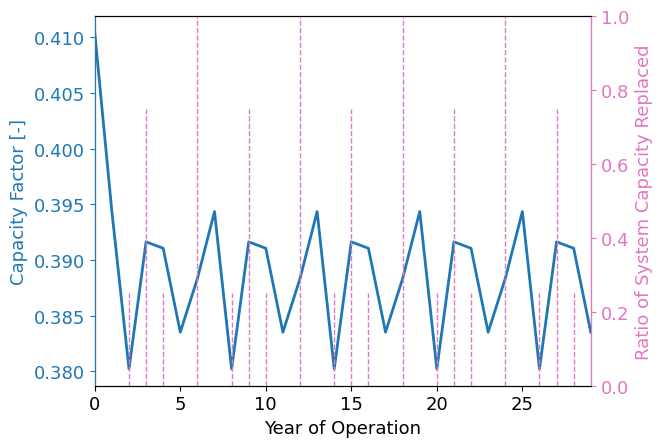

In [19]:
performance_schedules = H2_results["Performance Schedules"]
year = performance_schedules.index.to_list()
capacity_factor = performance_schedules["Capacity Factor [-]"].to_list()
percent_of_system_replaced = (performance_schedules["Refurbishment Schedule [MW replaced/year]"]/default_config["electrolyzer"]["rating"]).to_list()

fig,ax=plt.subplots(1,1)
fig.set_figwidth(6.4)
fig.set_figheight(4.8)
ax.plot(year,capacity_factor,color="tab:blue",lw=2.0,label="Capacity Factor [-]")
ax.set_xlim([year[0],year[-1]])
ax.set_ylabel("Capacity Factor [-]",color="tab:blue")
ax.tick_params(axis='y',colors="tab:blue")
ax.set_xlabel("Year of Operation")

ax2 = ax.twinx()
ax2.vlines(year,np.zeros(len(year)),np.array(percent_of_system_replaced),ls = "--",lw = 1.0,color="tab:pink")
ax2.set_ylabel("Ratio of System Capacity Replaced",color="tab:pink")
ax2.tick_params(axis='y',colors="tab:pink")
ax2.set_ylim([0,1])
ax2.spines['right'].set_color('tab:pink') 
ax2.spines['left'].set_color('tab:blue') 